# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [14]:
import numpy as np

affitti_mensili = np.array([720, 980, 650, 1200])
spesa_tot_mensile1 = np.sum(affitti_mensili)
print("Spesa totale mensile degli inquilini:", spesa_tot_mensile1)

affitti_mensili[3] += 1200*12/100
print("Aumento del 12% al quarto appartamento:")
print(affitti_mensili)

spesa_tot_mensile2 = np.sum(affitti_mensili)
print("Nuova spesa totale mesile: ", spesa_tot_mensile2)

affitti_mensili[2] -= 650*10/100
print("Sconto del 10% al terzo appartamento:")
print(affitti_mensili)

affitti_mensili[0] += 720*5/100
affitti_mensili[1] += 980*5/100
print("Aumento 5% primo e secondo appartamento:")
print(affitti_mensili)

print("Quanto ha influito l'aumento dell'affitto più alto sulla spesa complessiva:", spesa_tot_mensile2-spesa_tot_mensile1)


Spesa totale mensile degli inquilini: 3550
Aumento del 12% al quarto appartamento:
[ 720  980  650 1344]
Nuova spesa totale mesile:  3694
Sconto del 10% al terzo appartamento:
[ 720  980  585 1344]
Aumento 5% primo e secondo appartamento:
[ 756 1029  585 1344]
Quanto ha influito l'aumento dell'affitto più alto sulla spesa complessiva: 144


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

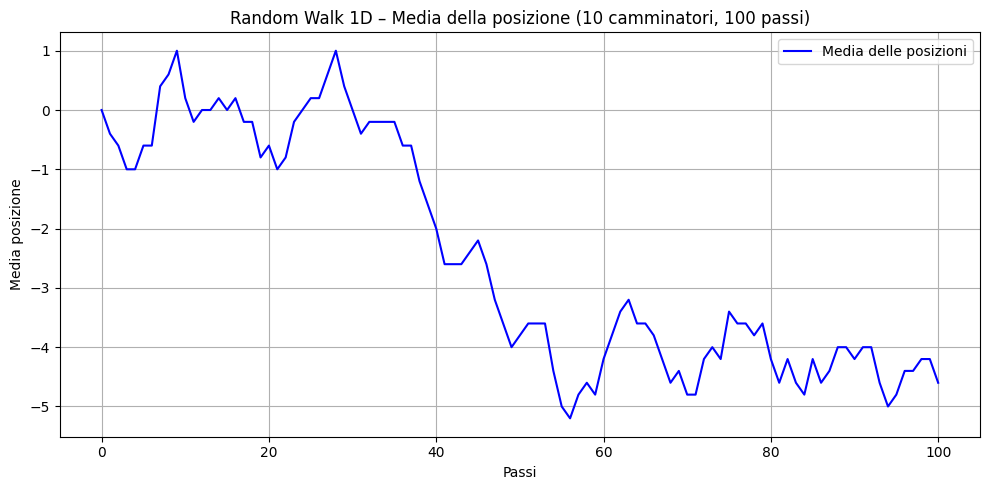

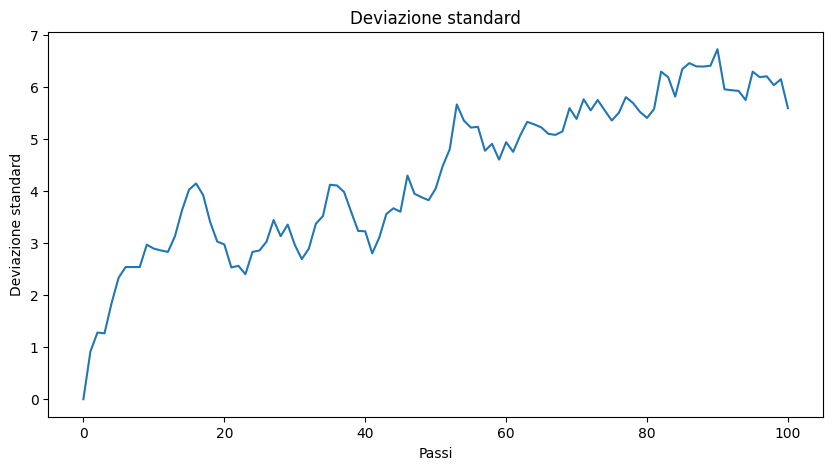

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n, N):
    # Genera array di passi: +1 o -1 con uguale probabilità
    steps = np.random.choice([-1, 1], size=(N, n))

    # Somma cumulativa lungo i passi -> posizione nel tempo
    positions = np.cumsum(steps, axis=1)  # Ogni elemento mostra la posizione del camminatore a quel passo

    start = np.zeros((N, 1))  # crea colonna iniziale di zeri
    positions = np.concatenate((start, positions), axis=1)

    # Calcolo media e deviazione standard per ciascun passo
    media = np.mean(positions, axis=0)
    dev_std = np.std(positions, axis=0)

    return media, dev_std

# Parametri
n= 100
N = 10

# Esegui la simulazione
media, dev_std = random_walk(n, N)

# Asse dei passi (da 0 a 100)
passi = np.arange(n + 1)

# Plot 
plt.figure(figsize=(10, 5))
plt.plot(passi, media, label="Media delle posizioni", color='blue')
plt.title(f"Random Walk 1D – Media della posizione ({N} camminatori, {n} passi)")
plt.xlabel("Passi")
plt.ylabel("Media posizione")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(passi, dev_std, label="Deviazione standard")
plt.title("Deviazione standard")
plt.xlabel("Passi")
plt.ylabel("Deviazione standard")
plt.show()


## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [51]:
np.random.seed(42)

array = np.random.normal(loc=0.0, scale=1.0, size=(5, 9))
print(array)
dist = np.abs(array-0.1) # distanza da 0.1 in valore assoluto
min_ind = np.argmin(dist, axis=1) # indici del minimo in ogni ogni riga
rows = np.arange(array.shape[0]) # [0, 1, ..., 4]
mins = array[rows, min_ind]
print(mins)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]
[-0.1382643   0.24196227  0.11092259 -0.01349722  0.17136828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# 1. Passeggeri ordinati per 'Fare' 
max_fare = df.sort_values(by='Fare', ascending=False).head(10)
max_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_index
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0.000000
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0.000000
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0.000000
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0.022814
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,0.015209
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,0.022814
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0.022814
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,0.015245
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,0.015245
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0.000000


In [ ]:
# 2. media di: `Age` (età), `Fare` (tariffa), `SibSp` (numero di fratelli/coniugi a bordo)
print("media di Age:", df['Age'].mean())
print("media si Fare:", df['Fare'].mean())
print("media di SibSp:", df['SibSp'].mean())

# 3. colonna Family_index
# Evita divisioni per zero: se 'fare' è 0, sostituiscilo con np.nan temporaneamente
fare_safe = df['Fare'].replace(0, np.nan)
# calcolo il "peso familiare"
df['Family_index'] = (df['SibSp'] * df['Parch']) / fare_safe

# 4. passeggero con massimo Family_index
df.sort_values(by='Family_index', ascending=False).head(1)


media di Age: 29.69911764705882
media si Fare: 32.204207968574636
media di SibSp: 0.5230078563411896


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_index
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,1.009464


In [65]:
# 5. passeggeri con Fare > 100
df[df['Fare'] > 100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_nonzero,Family_index
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,263.0,0.019011
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,263.0,0.019011
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,247.5208,0.00404
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,146.5208,0.0
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,113.275,0.008828


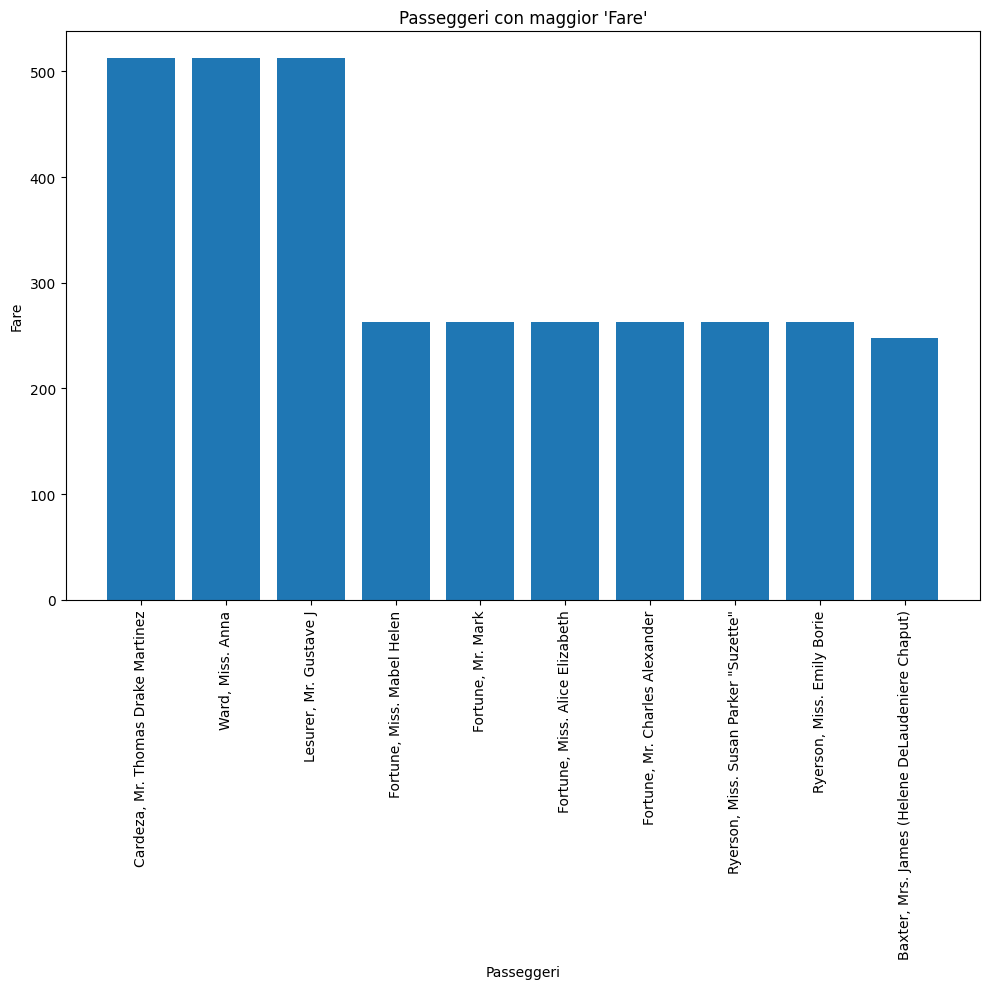

In [67]:
# Barplot passeggeri che hanno pagato più Fare
plt.figure(figsize=(10,10))
plt.bar(max_fare['Name'], max_fare['Fare'])
plt.title("Passeggeri con maggior 'Fare'")
plt.xlabel("Passeggeri")
plt.ylabel("Fare")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


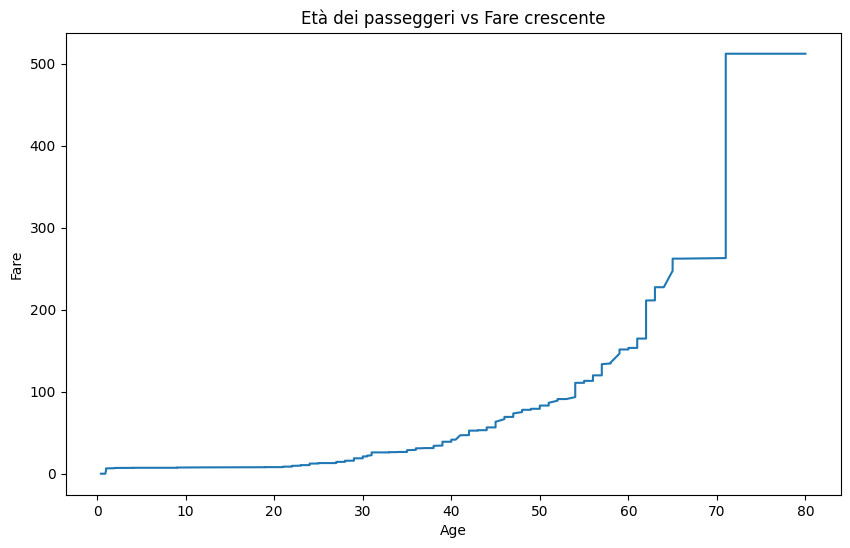

In [62]:
# 7. grafico a linee dell’età, ordinando i passeggeri per tariffa crescente
età = df['Age'].sort_values()
fare = df['Fare'].sort_values()

plt.figure(figsize=(10,6))
plt.plot(età, fare, linestyle='-')
plt.title("Età dei passeggeri vs Fare crescente")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


In [103]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Dimensione del dataset:  (344, 7)
Valri mancanti per colonna:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Righe duplicate:  0
Valori mancanti in 'body_mass_g':  0
Massa corporea media per ogni specie:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


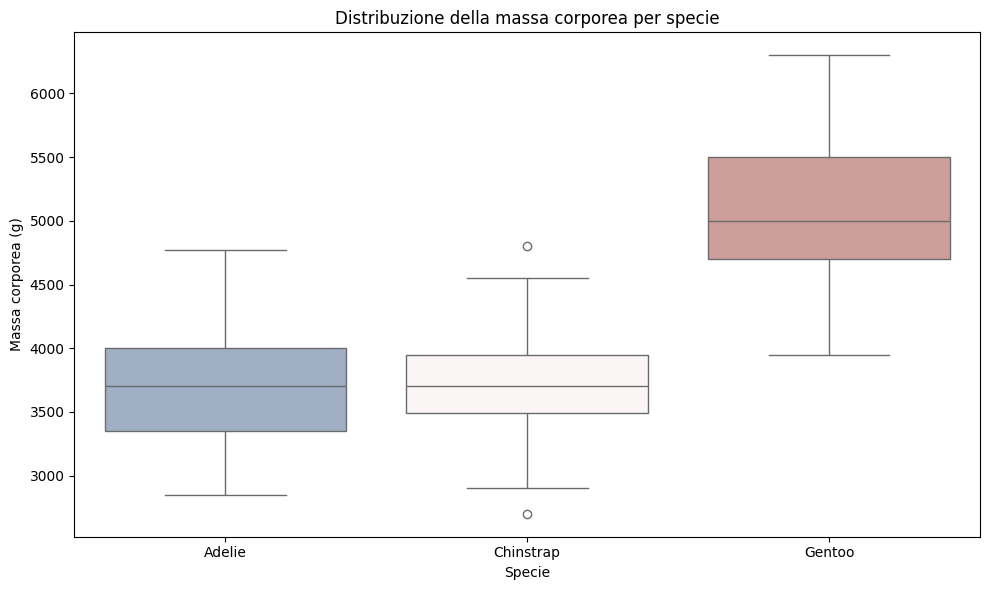

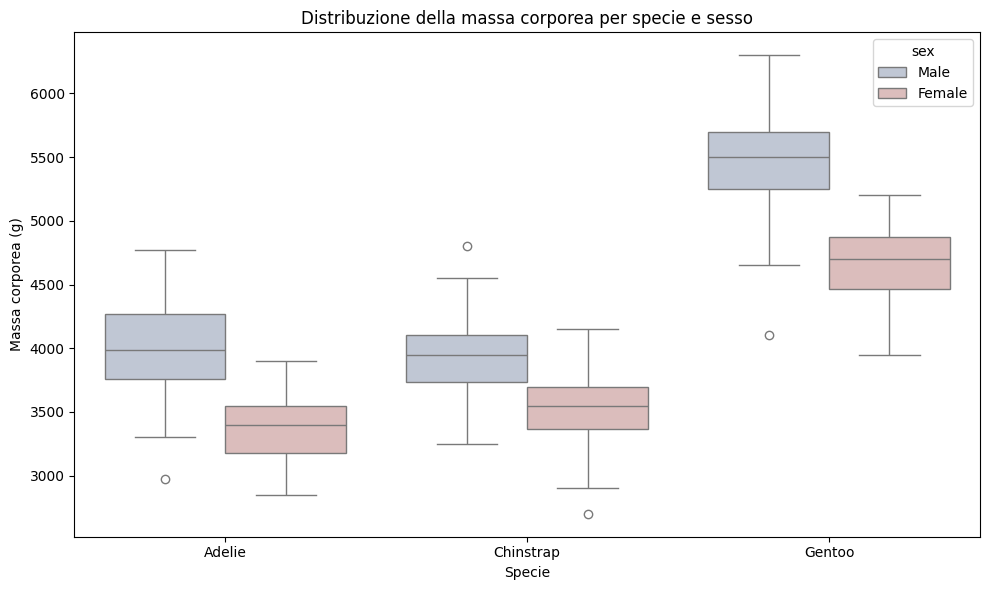

In [104]:
# 1. Quante righe e colonne ha il dataset?
print("Dimensione del dataset: ", df.shape)  # righe x colonne

# 2. Controlla quanti valori mancanti ci sono per colonna
print("Valri mancanti per colonna:\n", df.isna().sum())

# 3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente
sex_freq = df['sex'].mode().iloc[0]  # mode() restituisce sempre una Serie, fillna si aspetta un valore singolo
df['sex'] = df['sex'].fillna(sex_freq)

# 4. Rimuovi le righe in cui il valore `body_mass_g` è mancante
df = df[df['body_mass_g'].notna()]

# 5. Controlla se ci sono righe duplicate
print("Righe duplicate: ", df.duplicated().sum())

# 6. Calcola la massa corporea media (`body_mass_g`) per ogni specie (`species`). Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.
print("Valori mancanti in 'body_mass_g': ", df['body_mass_g'].isna().sum())
print("Massa corporea media per ogni specie:")
print(df.groupby('species')['body_mass_g'].mean())

# 7. Visualizza la distribuzione della massa corporea (`body_mass_g`) per specie
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='species', palette="vlag")
plt.title("Distribuzione della massa corporea per specie")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.tight_layout()
plt.show()

# 8. Visualizza la distribuzione della massa corporea per specie, dividendo per sesso (`sex`) e mostrandoli a confronto
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex', palette="vlag")
plt.title("Distribuzione della massa corporea per specie e sesso")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.tight_layout()
plt.show()


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


Parametri stimati: 3.0143371775614702 2.1542219635827586
Equazione: y = 3.01 * x + 2.15


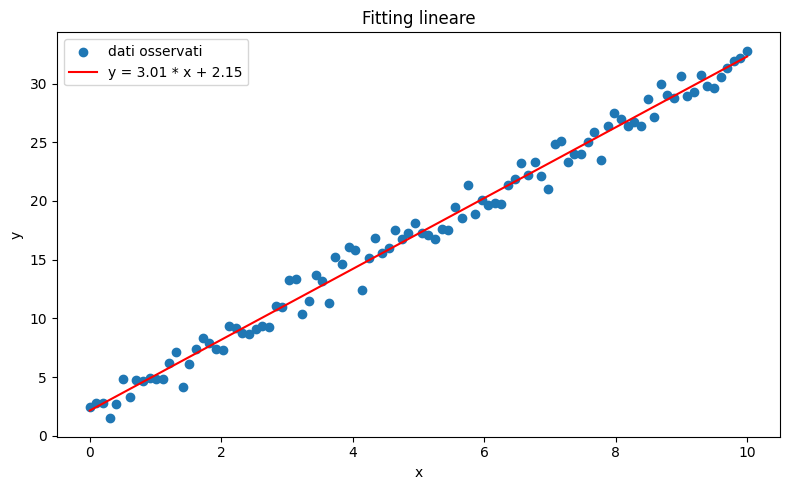

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

def fit_line(x, y):
    popt, _ = curve_fit(linear_model, x, y)
    str = f"y = {popt[0]:.2f} * x + {popt[1]:.2f}"
    return popt[0], popt[1], str

# dati
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

# fit
a, b, eq = fit_line(x, y)
y_fit = a * x + b
print("Parametri stimati:", a, b)
print("Equazione:", eq)

# plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, label='dati osservati')
plt.plot(x, y_fit, color='r', label=eq)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting lineare")
plt.legend()
plt.tight_layout()
plt.show()

